# Land Cover Change Analysis

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
root = 'C:/Users/19397/Documents/GitHub/MUSA_6950/NationalParks_AI'
mosaic_path = 'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/mosacied-lu-chicago.tif'
# Open the raster file
with rasterio.open(mosaic_path) as src:
    classified_img = src.read(1)  # Read the first (only) band

# Plot the classified raster
plt.figure(figsize=(10, 8))
plt.imshow(classified_img, cmap="tab10")  # 'tab10' provides distinct colors
plt.colorbar(label="Land Cover Class")  # Optional colorbar
plt.title("Classified Land Cover Map, A Part of Chicago")
plt.axis("off")  # Hide axis ticks
plt.show()

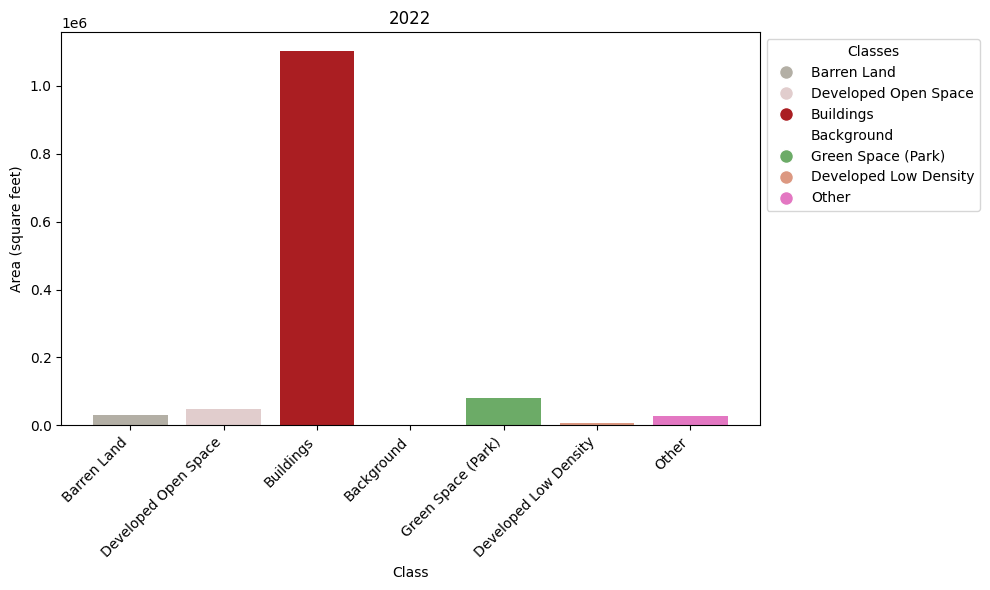

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import matplotlib.colors as mcolors

# Path to the classified raster file
mosaic_path = 'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-classified/classified_mask2022-naip.tif'

# Open the raster file to access the data and metadata
with rasterio.open(mosaic_path) as src:
    classified_img = src.read(1)  # Read the first (only) band
    nodata_value = src.nodata  # Check the NoData value, if exists
    pixel_size = src.res  # This gives (pixel_width, pixel_height) in feet
    pixel_area = pixel_size[0] * pixel_size[1]  # Pixel area in square feet

# Handle NoData values (e.g., replace them with a specific value if needed)
if nodata_value is not None:
    classified_img[classified_img == nodata_value] = 0  # Replace NoData with 0 or any appropriate value

# Get unique classes and their counts
unique_classes, counts = np.unique(classified_img, return_counts=True)

# Calculate the area for each class (in square feet)
class_areas_ft2 = counts * pixel_area  # Area = pixel count * pixel area (square feet)

# Define new colors for the bars
cmap = mcolors.ListedColormap([
    '#B3AFA5',  # Class 1 - Barren Land
    '#E1CDCD',  # Class 2 - Developed Open Space
    '#AA1E22',  # Class 3 - Buildings
    '#FFFFFF',  # Class 4 - Background
    '#6CAB67',  # Class 5 - Green Space (Park)
    '#DC9881',  # Class 6 - Developed Low Density
    '#e377c2'   # Class 7 - Other
])

# Create the legend labels corresponding to the class values
legend_labels = [
    'Barren Land', 
    'Developed Open Space', 
    'Buildings', 
    'Background', 
    'Green Space (Park)', 
    'Developed Low Density', 
    'Other'
]

# Plotting the bar plot for class areas
plt.figure(figsize=(10, 6))

# Bar colors corresponding to the classes
bar_colors = cmap(range(len(unique_classes)))

# Plot the bars
plt.bar(unique_classes, class_areas_ft2, color=bar_colors)

# Add title and axis labels
plt.xlabel('Class')
plt.ylabel('Area (square feet)')
plt.title('2022')

# Set x-axis labels to the class names and rotate them by 45 degrees
plt.xticks(unique_classes, legend_labels, rotation=45, ha='right')

# Create a custom legend for the classes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10) for i in range(7)]
plt.legend(handles, legend_labels, title="Classes", loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


Unique values in the classified raster: [1 2 3 4 5 6 7]
NoData value: None


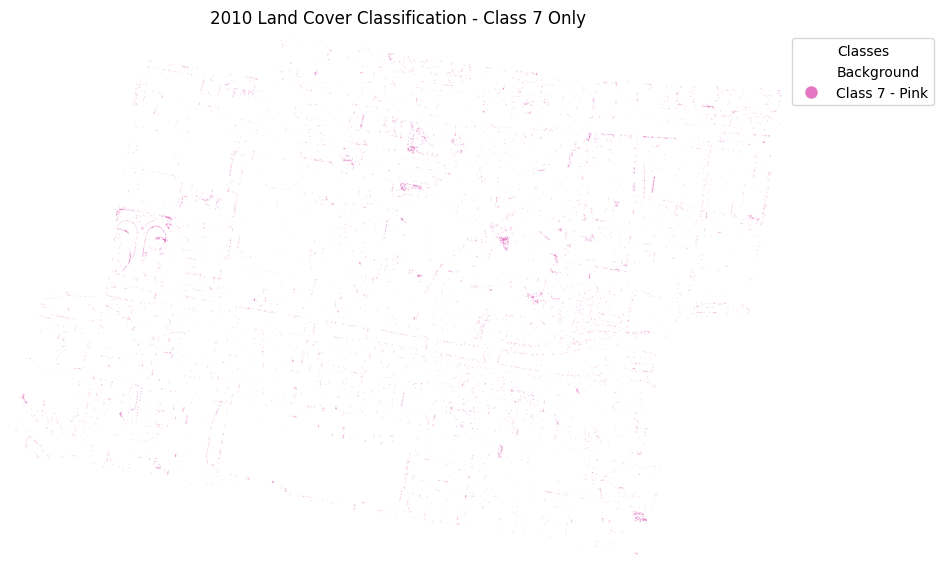

In [4]:
import rasterio
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

mosaic_path = 'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-classified/classified_mask2010-naip.tif'

# Open the raster file
with rasterio.open(mosaic_path) as src:
    classified_img = src.read(1)  # Read the first (only) band
    nodata_value = src.nodata  # Check the NoData value, if exists

# Check unique values in the raster (to understand classification)
print(f"Unique values in the classified raster: {np.unique(classified_img)}")
print(f"NoData value: {nodata_value}")

# Handle NoData values (e.g., replace them with a specific value if needed)
if nodata_value is not None:
    classified_img[classified_img == nodata_value] = 0  # Replace NoData with 0 or any appropriate value

# Set all values except Class 7 to 0 (background value)
classified_img[classified_img != 7] = 0

# Define a custom colormap with one color for Class 7 (and background for the rest)
cmap = mcolors.ListedColormap([
    '#FFFFFF',  # Background (0)
    '#e377c2'   # Class 7 - Pink (highlighted)
])

# Create the legend labels corresponding to the class values
legend_labels = ['Background', 'Class 7 - Pink']

# Plot the classified raster with the custom colormap
plt.figure(figsize=(10, 8))
imshow_obj = plt.imshow(classified_img, cmap=cmap, vmin=0, vmax=1)  # Set the range of classes to 0 and 1 for Class 7

plt.title("2010 Land Cover Classification - Class 7 Only")
plt.axis("off")  # Hide axis ticks

# Create a custom legend for the classes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10) for i in range(2)]
plt.legend(handles, legend_labels, title="Classes", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()


In [11]:
import rasterio

# Path to the classified raster file
mosaic_path = 'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-classified/classified_mask2022-naip.tif'

# Open the raster file to access metadata
with rasterio.open(mosaic_path) as src:
    # Get pixel size (resolution)
    pixel_size = src.res  # This gives (pixel_width, pixel_height) in map units (meters, feet, etc.)
    
    # Calculate pixel area (in square meters, assuming the raster is in meters)
    pixel_area = pixel_size[0] * pixel_size[1]
    
    print(f"Pixel size (width x height): {pixel_size}")
    print(f"Pixel area (in square units): {pixel_area}")


Pixel size (width x height): (0.6, 0.6)
Pixel area (in square units): 0.36


Class 1 area: 30810.96 square feet
Class 2 area: 49219.56 square feet
Class 3 area: 1103006.88 square feet
Class 4 area: 691481.16 square feet
Class 5 area: 79008.84 square feet
Class 6 area: 5439.96 square feet
Class 7 area: 28306.079999999998 square feet


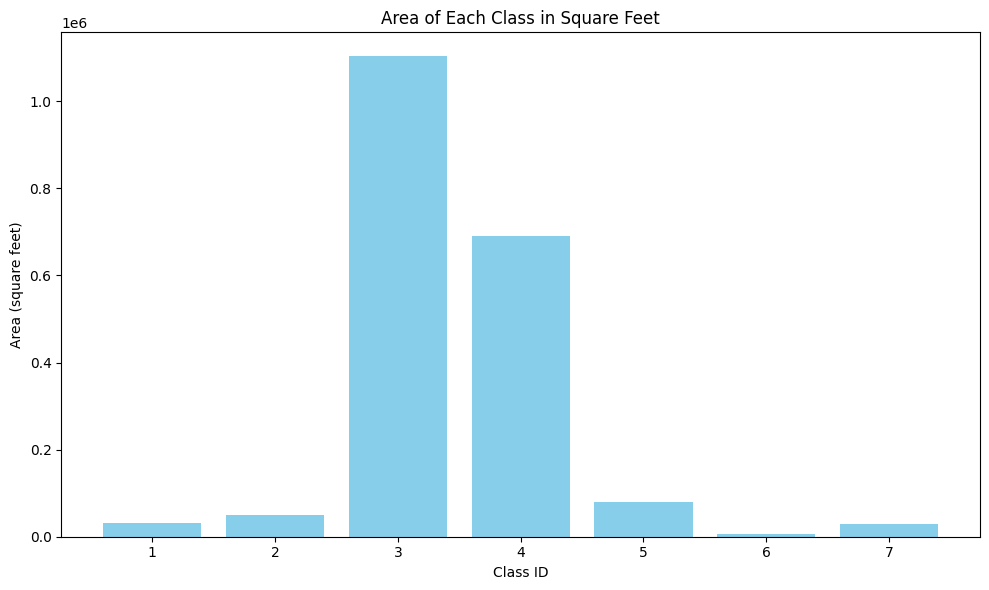

In [13]:
import rasterio
import numpy as np

# Path to the classified raster file
mosaic_path = 'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-classified/classified_mask2022-naip.tif'

# Open the raster file to access the data and metadata
with rasterio.open(mosaic_path) as src:
    classified_img = src.read(1)  # Read the first (only) band
    nodata_value = src.nodata  # Check the NoData value, if exists
    pixel_size = src.res  # This gives (pixel_width, pixel_height) in feet
    pixel_area = pixel_size[0] * pixel_size[1]  # Pixel area in square feet
    
# Handle NoData values (e.g., replace them with a specific value if needed)
if nodata_value is not None:
    classified_img[classified_img == nodata_value] = 0  # Replace NoData with 0 or any appropriate value

# Get unique classes and their counts
unique_classes, counts = np.unique(classified_img, return_counts=True)

# Calculate the area for each class (in square feet)
class_areas_ft2 = counts * pixel_area  # Area = pixel count * pixel area (square feet)

# Print the area for each class
for class_id, area in zip(unique_classes, class_areas_ft2):
    print(f"Class {class_id} area: {area} square feet")

# Plotting the bar plot for class areas
plt.figure(figsize=(10, 6))
plt.bar(unique_classes, class_areas_ft2, color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Area (square feet)')
plt.title('Area of Each Class in Square Feet')
plt.xticks(unique_classes)  # Ensure each class has a label on the x-axis
plt.tight_layout()
plt.show()

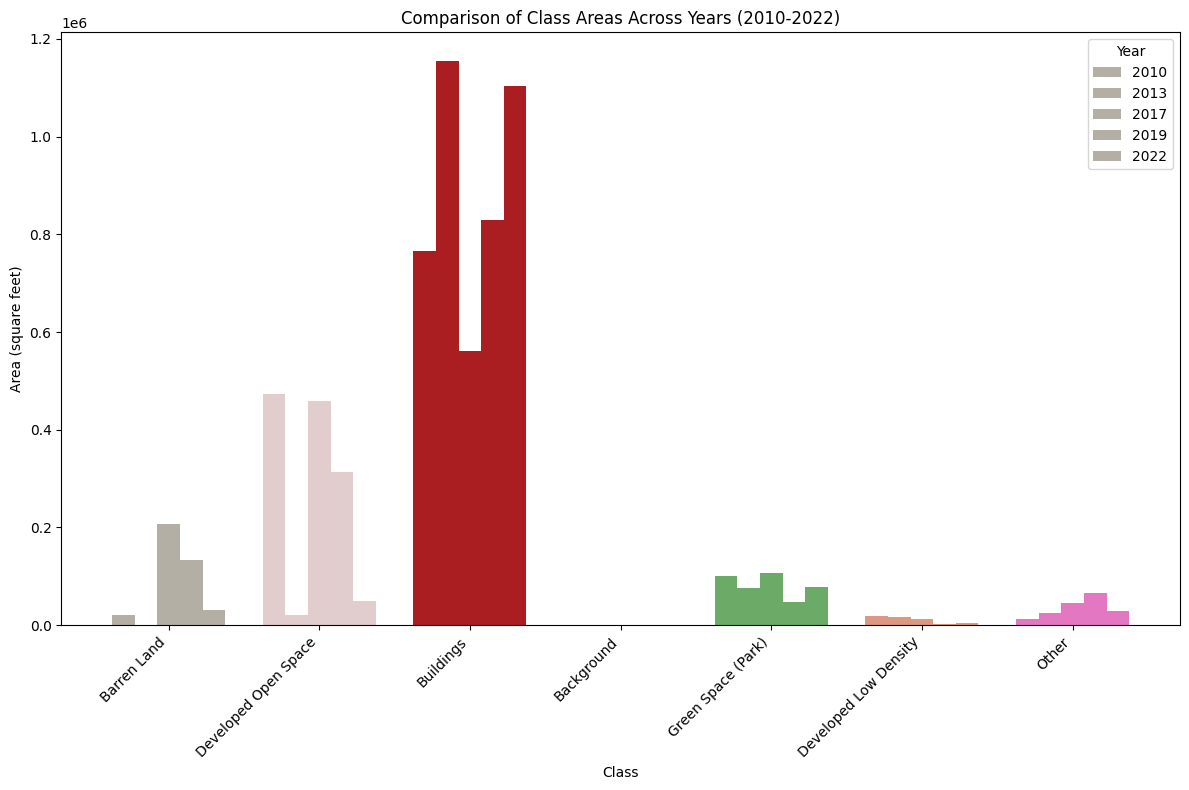

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import matplotlib.colors as mcolors

# List of raster file paths for different years
raster_paths = [
    'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-classified/classified_mask2010-naip.tif',
    'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-classified/classified_mask2013-naip.tif',
    'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-classified/classified_mask2017-naip.tif',
    'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-classified/classified_mask2019-naip.tif',
    'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-classified/classified_mask2022-naip.tif'
]

# Function to calculate the area for each class in a raster
def calculate_area(raster_path):
    with rasterio.open(raster_path) as src:
        classified_img = src.read(1)  # Read the first (only) band
        nodata_value = src.nodata  # Check the NoData value, if exists
        pixel_size = src.res  # This gives (pixel_width, pixel_height) in feet
        pixel_area = pixel_size[0] * pixel_size[1]  # Pixel area in square feet

    # Handle NoData values (e.g., replace them with a specific value if needed)
    if nodata_value is not None:
        classified_img[classified_img == nodata_value] = 0  # Replace NoData with 0 or any appropriate value

    # Get unique classes and their counts
    unique_classes, counts = np.unique(classified_img, return_counts=True)

    # Calculate the area for each class (in square feet)
    class_areas_ft2 = counts * pixel_area  # Area = pixel count * pixel area (square feet)
    
    return unique_classes, class_areas_ft2

# Plotting the comparison for all years
plt.figure(figsize=(12, 8))

# Define class names and colors for the plot (based on your previous classes)
legend_labels = [
    'Barren Land', 
    'Developed Open Space', 
    'Buildings', 
    'Background', 
    'Green Space (Park)', 
    'Developed Low Density', 
    'Other'
]

# Define the custom color map for the bars (same colors as in your initial request)
cmap = mcolors.ListedColormap([
    '#B3AFA5',  # Class 1 - Barren Land
    '#E1CDCD',  # Class 2 - Developed Open Space
    '#AA1E22',  # Class 3 - Buildings
    '#FFFFFF',  # Class 4 - Background
    '#6CAB67',  # Class 5 - Green Space (Park)
    '#DC9881',  # Class 6 - Developed Low Density
    '#e377c2'   # Class 7 - Other
])

# Years corresponding to the rasters
years = ['2010', '2013', '2017', '2019', '2022']

# Store the areas for each year
all_class_areas = {}

# Loop over each raster to calculate the areas and store them
for i, raster_path in enumerate(raster_paths):
    unique_classes, class_areas_ft2 = calculate_area(raster_path)
    all_class_areas[years[i]] = class_areas_ft2

# Plotting the area comparison for each class across the years
bar_width = 0.15
index = np.arange(len(legend_labels))  # Adjust to the number of classes (7)

# Creating bars for each year
for i, year in enumerate(years):
    plt.bar(index + (i - 2) * bar_width, all_class_areas[year], bar_width, label=year, color=cmap.colors)

# Adding labels, title, and legend
plt.xlabel('Class')
plt.ylabel('Area (square feet)')
plt.title('Comparison of Class Areas Across Years (2010-2022)')
plt.xticks(index, legend_labels, rotation=45, ha='right')  # Adjust x-ticks for classes
plt.legend(title="Year")

plt.tight_layout()
plt.show()


In [24]:
# Step 2: If the CRS doesn't match, reproject the shapefile to match the raster's CRS
shapefile_path = 'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-data/StudyArea_reprojected_mosaic.shp'
raster_path = 'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-data/land_use_resampled.tif'

# Load the shapefile using geopandas
study_area = gpd.read_file(shapefile_path)

# Reproject the shapefile to the raster's CRS if needed
with rasterio.open(raster_path) as src:
    raster_crs = src.crs

# Reproject if CRS does not match
if study_area.crs != raster_crs:
    study_area = study_area.to_crs(raster_crs)
    print("Shapefile CRS reprojected to match raster CRS")
# Step 3: Clip the raster using the study area (polygon geometry)
with rasterio.open(raster_path) as src:
    # Get the geometries of the study area
    geometries = study_area.geometry.values  # Assuming study area is in polygon format
    
    # Use rasterio.mask to apply the geometry mask on the raster
    out_image, out_transform = mask(src, geometries, crop=True)
    out_meta = src.meta

# Step 4: Update the metadata to reflect the changes (cropped raster)
out_meta.update({
    "driver": "GTiff",
    "count": 1,
    "dtype": "float32",  # Update according to your raster data type
    "crs": raster_crs,
    "transform": out_transform
})

# Step 5: Display the clipped raster
plt.figure(figsize=(10, 8))
plt.imshow(out_image[0], cmap="tab10")  # Plot the first band (assuming single-band raster)
plt.colorbar(label="Land Use Class")
plt.title("Clipped Land Use Raster")
plt.axis("off")  # Hide axis ticks
plt.show()

RasterioIOError: C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-data/land_use_resampled.tif: No such file or directory

In [21]:
import fiona
from matplotlib import pyplot as plt
import rasterio
from rasterio.mask import mask  # Import the mask function from rasterio.mask
def display_naip_tile(filename, dsfactor = 2):
    """
    Display a NAIP tile using rasterio.
    
    dsfactor: downsample factor
    For .mrf-formatted tiles (which span multiple files), 'filename' should refer to the 
    .mrf file.
    """
    
    # NAIP tiles are enormous; downsize for plotting in this notebook
    
    with rasterio.open(filename) as raster:
        # rasterio uses 1-based indexing for channels.
        h = int(raster.height/dsfactor)
        w = int(raster.width/dsfactor)
        print('Resampling to {},{}'.format(h,w))
        ir = raster.read(4, out_shape=(1, h, w))
        r = raster.read(1, out_shape=(1, h, w))
        g = raster.read(2, out_shape=(1, h, w))
        
    cir = np.dstack((ir,r,g))
    fig = plt.figure(figsize=(7.5, 7.5), dpi=100, edgecolor='k')
    plt.imshow(cir)
    raster.close()

input_value_raster = 'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-data/lu_philly.tif'
shpfile = 'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-data/StudyArea_reprojected_mosaic.shp'
out_raster = 'C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-data/mask-lu.tif'


with fiona.open(shpfile, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

with rasterio.open(input_value_raster) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "count": out_image.shape[0],  # Ensure correct number of bands
                 "dtype": out_image.dtype,  # Ensure correct data type
                 "compress": None,
                 "transform": out_transform})

with rasterio.open(out_raster, "w", **out_meta) as dest:
    dest.write(out_image)

display_naip_tile('C:/Users/19397/Documents/GitHub/MUSA_6950/ai-urban-sustainability/lab6-machine-learning/CT-data/mask-lu.tif')

Resampling to 934,1379


IndexError: band index 4 out of range (not in (1,))

In [ ]:
# Open the raster file
with rasterio.open(out_raster) as src:
    classified_img = src.read(1)  # Read the first (only) band
    nodata_value = src.nodata  # Check the NoData value, if exists

# Check unique values in the raster (to understand classification)
print(f"Unique values in the classified raster: {np.unique(classified_img)}")
print(f"NoData value: {nodata_value}")

# Handle NoData values (e.g., replace them with a specific value if needed)
if nodata_value is not None:
    classified_img[classified_img == nodata_value] = 0  # Replace NoData with 0 or any appropriate value

# Plot the classified raster
# Plot the classified raster
plt.figure(figsize=(10, 8))
plt.imshow(classified_img, cmap="tab10")  # 'tab10' provides distinct colors
plt.colorbar(label="Land Cover Class")  # Optional colorbar
plt.title("2010")
plt.axis("off")  # Hide axis ticks
plt.show()